In [12]:
import pandas as pd

df_basinc = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/basinc.csv')
df_bulut = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/bulut.csv')
df_nem = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/nem.csv')
df_ruzgar = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/ruzgar_hizi_yonu.csv')
df_sicaklik = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/sicaklik.csv')
df_yagis = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/yagis_miktari.csv')

tables = [df_nem, df_ruzgar, df_sicaklik, df_yagis]
real_df = pd.merge(df_basinc, df_bulut, on = ['Yil', 'Ay', 'Gun', 'Saat'])

for i in tables:
    real_df = pd.merge(real_df, i, on = ['Yil', 'Ay', 'Gun', 'Saat'])

real_df.Yil = pd.Categorical(real_df.Yil)
real_df.Ay = pd.Categorical(real_df.Ay)
real_df.Gun = pd.Categorical(real_df.Gun)
real_df.Saat = pd.Categorical(real_df.Saat)

df = real_df.copy()
df = df.dropna()

df.tail()


,Yil,Ay,Gun,Saat,Basinc,Bulut,Nem,Ruzgar Hizi,Ruzgar Yonu,Sicaklik,Yagis
14227,Y2024,Ağustos,D15,T1900,1017.0,15.0,63.33604,19.353140,226.50743,23.870245,0.0
14228,Y2024,Ağustos,D15,T2000,1017.7,13.0,71.43643,19.453327,218.99100,22.060246,0.0
14229,Y2024,Ağustos,D15,T2100,1018.0,17.0,79.42330,19.376562,215.16644,20.660246,0.0
14230,Y2024,Ağustos,D15,T2200,1018.5,34.0,74.00095,16.434305,208.81079,21.610245,0.0
14231,Y2024,Ağustos,D15,T2300,1018.4,23.0,77.50878,17.076300,214.69516,20.900246,0.0


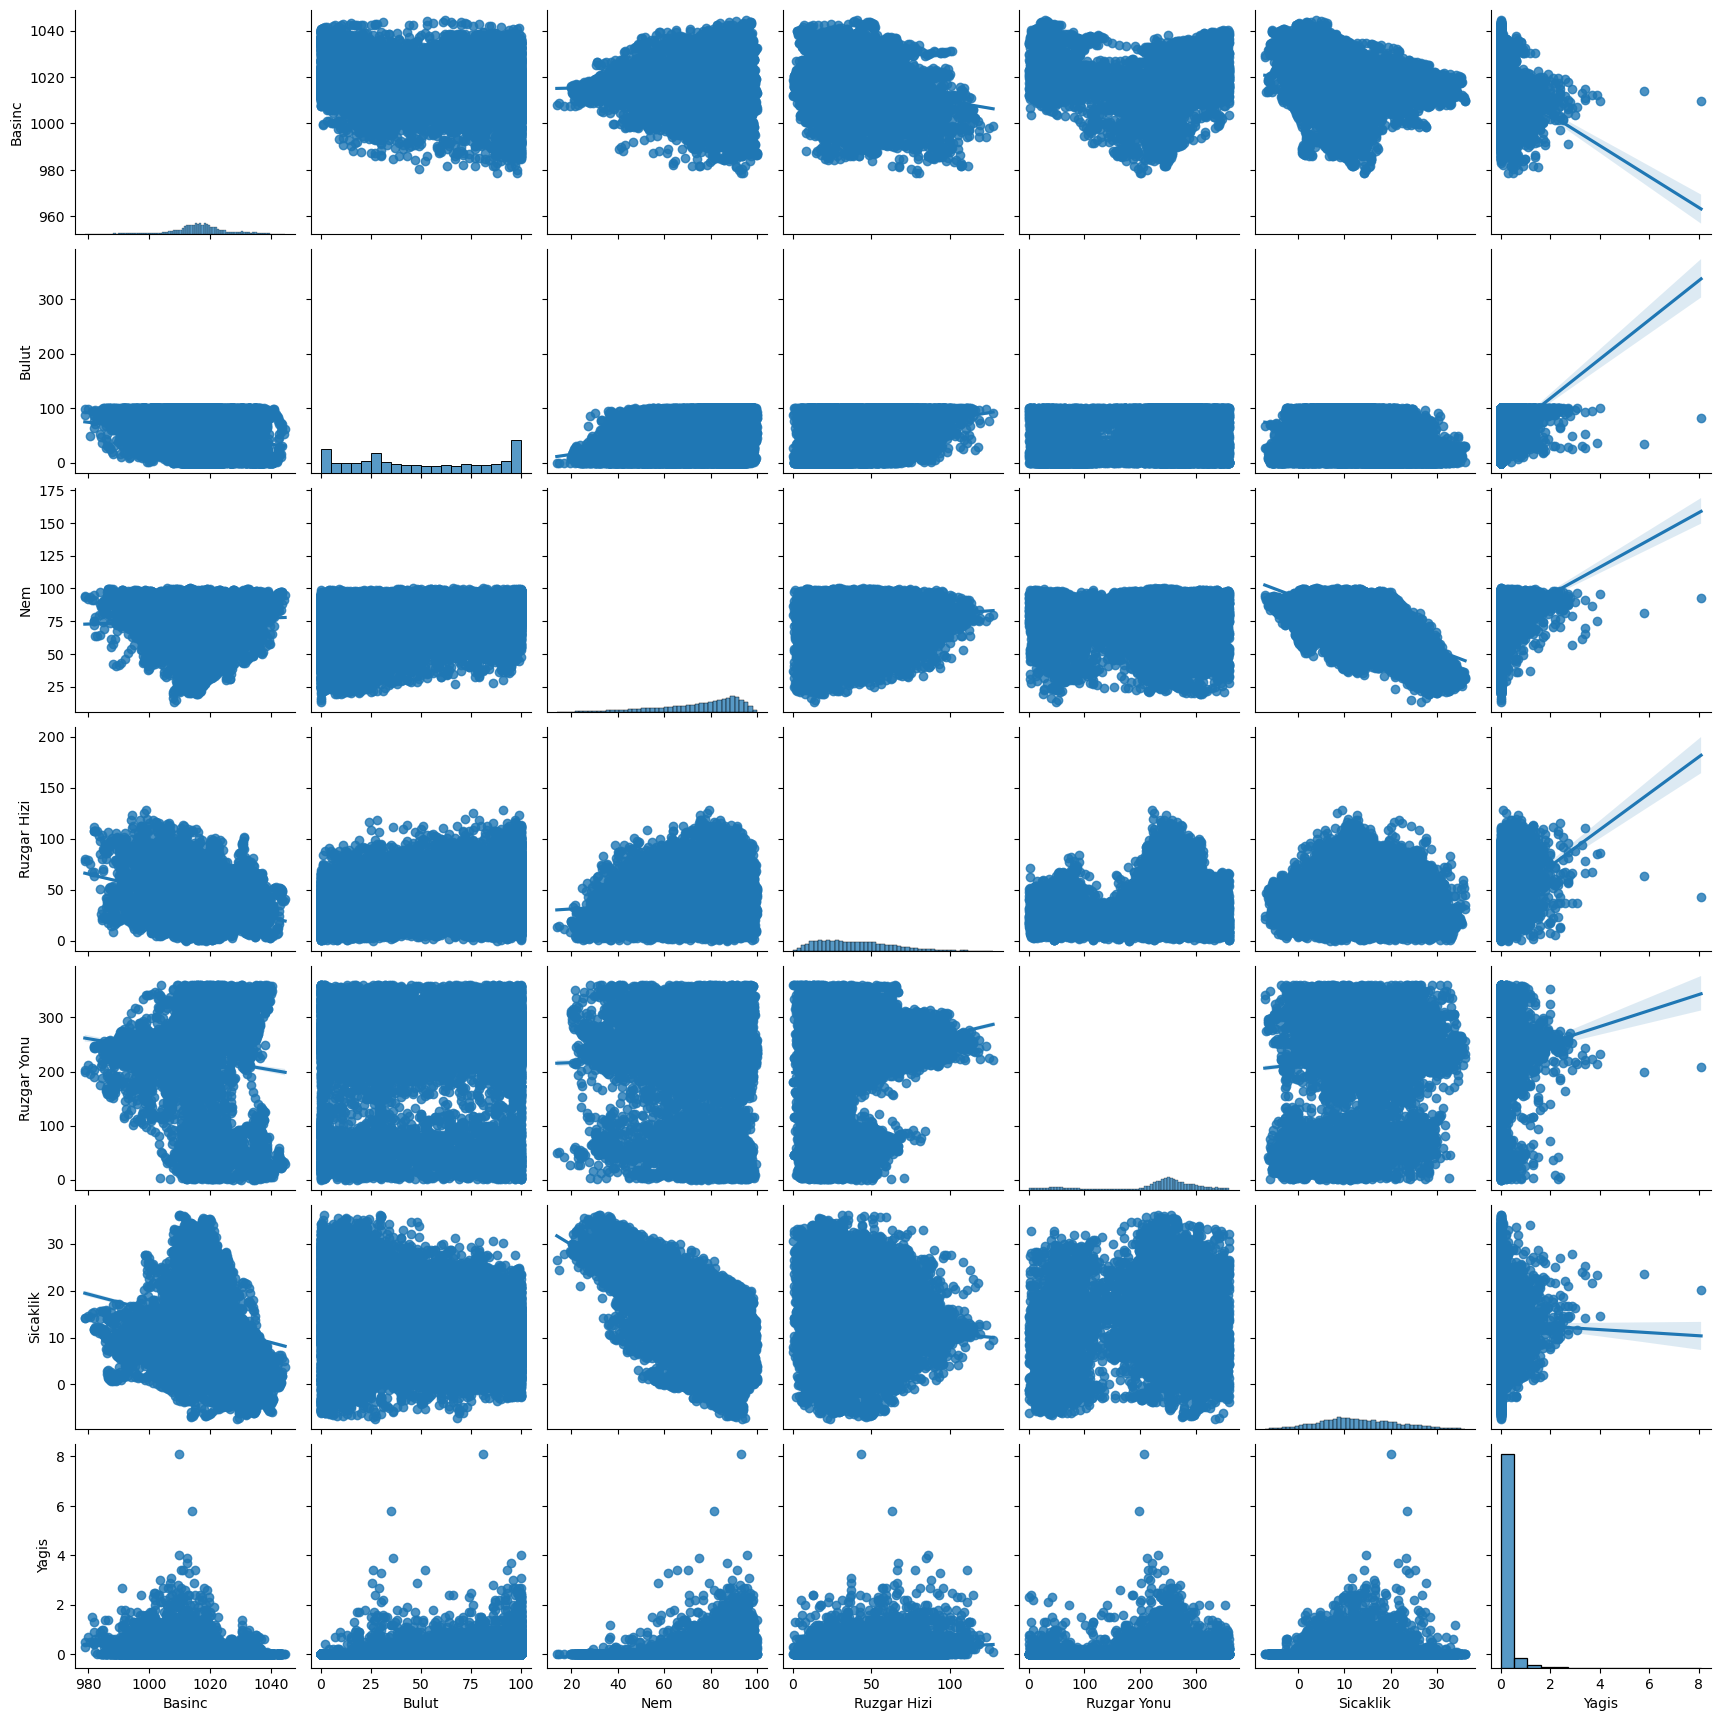

In [14]:
sns.pairplot(df, kind='reg')

In [3]:
df.head()

,Yil,Ay,Gun,Saat,Basinc,Bulut,Nem,Ruzgar Hizi,Ruzgar Yonu,Sicaklik,Yagis
0,Y2023,Ocak,D01,T0000,1021.4,8.700001,80.826390,83.567314,230.06802,12.270246,0.0
1,Y2023,Ocak,D01,T0100,1021.3,22.000000,79.099785,87.857704,229.65335,12.340245,0.0
2,Y2023,Ocak,D01,T0200,1021.5,44.000000,80.655174,90.806390,230.63068,11.840245,0.0
3,Y2023,Ocak,D01,T0300,1021.7,22.000000,81.831300,90.299736,230.66238,11.550245,0.0
4,Y2023,Ocak,D01,T0400,1021.9,4.000000,81.179360,90.745705,231.76617,11.260245,0.0


In [4]:
!pip install scikit-learn

In [6]:
import pandas as pd
from sklearn import preprocessing

df_basinc = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/basinc.csv')
df_bulut = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/bulut.csv')
df_nem = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/nem.csv')
df_ruzgar = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/ruzgar_hizi_yonu.csv')
df_sicaklik = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/sicaklik.csv')
df_yagis = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/yagis_miktari.csv')

ctable = ['Basinc','Bulut','Nem','Ruzgar Hizi','Ruzgar Yonu','Sicaklik','Yagis']
tables = [df_nem, df_ruzgar, df_sicaklik, df_yagis]
real_df = pd.merge(df_basinc, df_bulut, on = ['Yil', 'Ay', 'Gun', 'Saat'])

for i in tables:
    real_df = pd.merge(real_df, i, on = ['Yil', 'Ay', 'Gun', 'Saat'])

df = real_df.copy()
df = df.dropna()

df_st = pd.DataFrame(preprocessing.scale(df.select_dtypes('float64')), columns=ctable)
for i in ctable:
    df[i] = df_st[i]

df['Yil'] = df['Yil'].str[1:].astype(int)
df['Ay'] = df['Ay'].map({
    'Ocak': 1, 'Şubat': 2, 'Mart': 3, 'Nisan': 4, 'Mayıs': 5, 'Haziran': 6,
    'Temmuz': 7, 'Ağustos': 8, 'Eylül': 9, 'Ekim': 10, 'Kasım': 11, 'Aralık': 12
})
df['Gun'] = df['Gun'].str[1:].astype(int)
df['Saat'] = df['Saat'].str[1:].str[:2].astype(int)

df['datetime'] = pd.to_datetime(df[['Yil', 'Ay', 'Gun']].astype(str).agg('-'.join, axis=1) + ' ' + df['Saat'].astype(str), format='%Y-%m-%d %H')
df.set_index('datetime', inplace=True)
df.drop(columns=['Yil', 'Ay', 'Gun', 'Saat'], inplace=True)
df.head()

,Basinc,Bulut,Nem,Ruzgar Hizi,Ruzgar Yonu,Sicaklik,Yagis
datetime,,,,,,,
2023-01-01 00:00:00,0.557631,-1.214416,0.306023,1.997235,0.051216,-0.090143,-0.33846
2023-01-01 01:00:00,0.546397,-0.818391,0.203204,2.190371,0.046416,-0.081396,-0.33846
2023-01-01 02:00:00,0.568865,-0.163311,0.295827,2.323110,0.057728,-0.143878,-0.33846
2023-01-01 03:00:00,0.591333,-0.818391,0.365866,2.300302,0.058095,-0.180118,-0.33846
2023-01-01 04:00:00,0.613801,-1.354365,0.327043,2.320378,0.070870,-0.216358,-0.33846


In [7]:
df.dtypes

Basinc         float64
Bulut          float64
Nem            float64
Ruzgar Hizi    float64
Ruzgar Yonu    float64
Sicaklik       float64
Yagis          float64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Basinc,14232.0,4.205742e-15,1.000035,-4.228074,-0.487136,-0.004071,0.501461,3.152696
Bulut,14232.0,-1.318039e-16,1.000035,-1.473471,-0.848167,-0.133535,0.968191,1.504165
Nem,14232.0,-1.917147e-16,1.000035,-3.691836,-0.597565,0.277073,0.788776,1.447465
Ruzgar Hizi,14232.0,-6.390491e-17,1.000035,-1.764642,-0.801487,-0.133401,0.651613,3.975280
Ruzgar Yonu,14232.0,1.597623e-16,1.000035,-2.606878,-0.119906,0.267088,0.595858,1.555061
Sicaklik,14232.0,-1.917147e-16,1.000035,-2.531955,-0.711218,-0.090143,0.709632,2.894016
Yagis,14232.0,-3.994057e-17,1.000035,-0.338460,-0.338460,-0.338460,-0.338460,26.270947


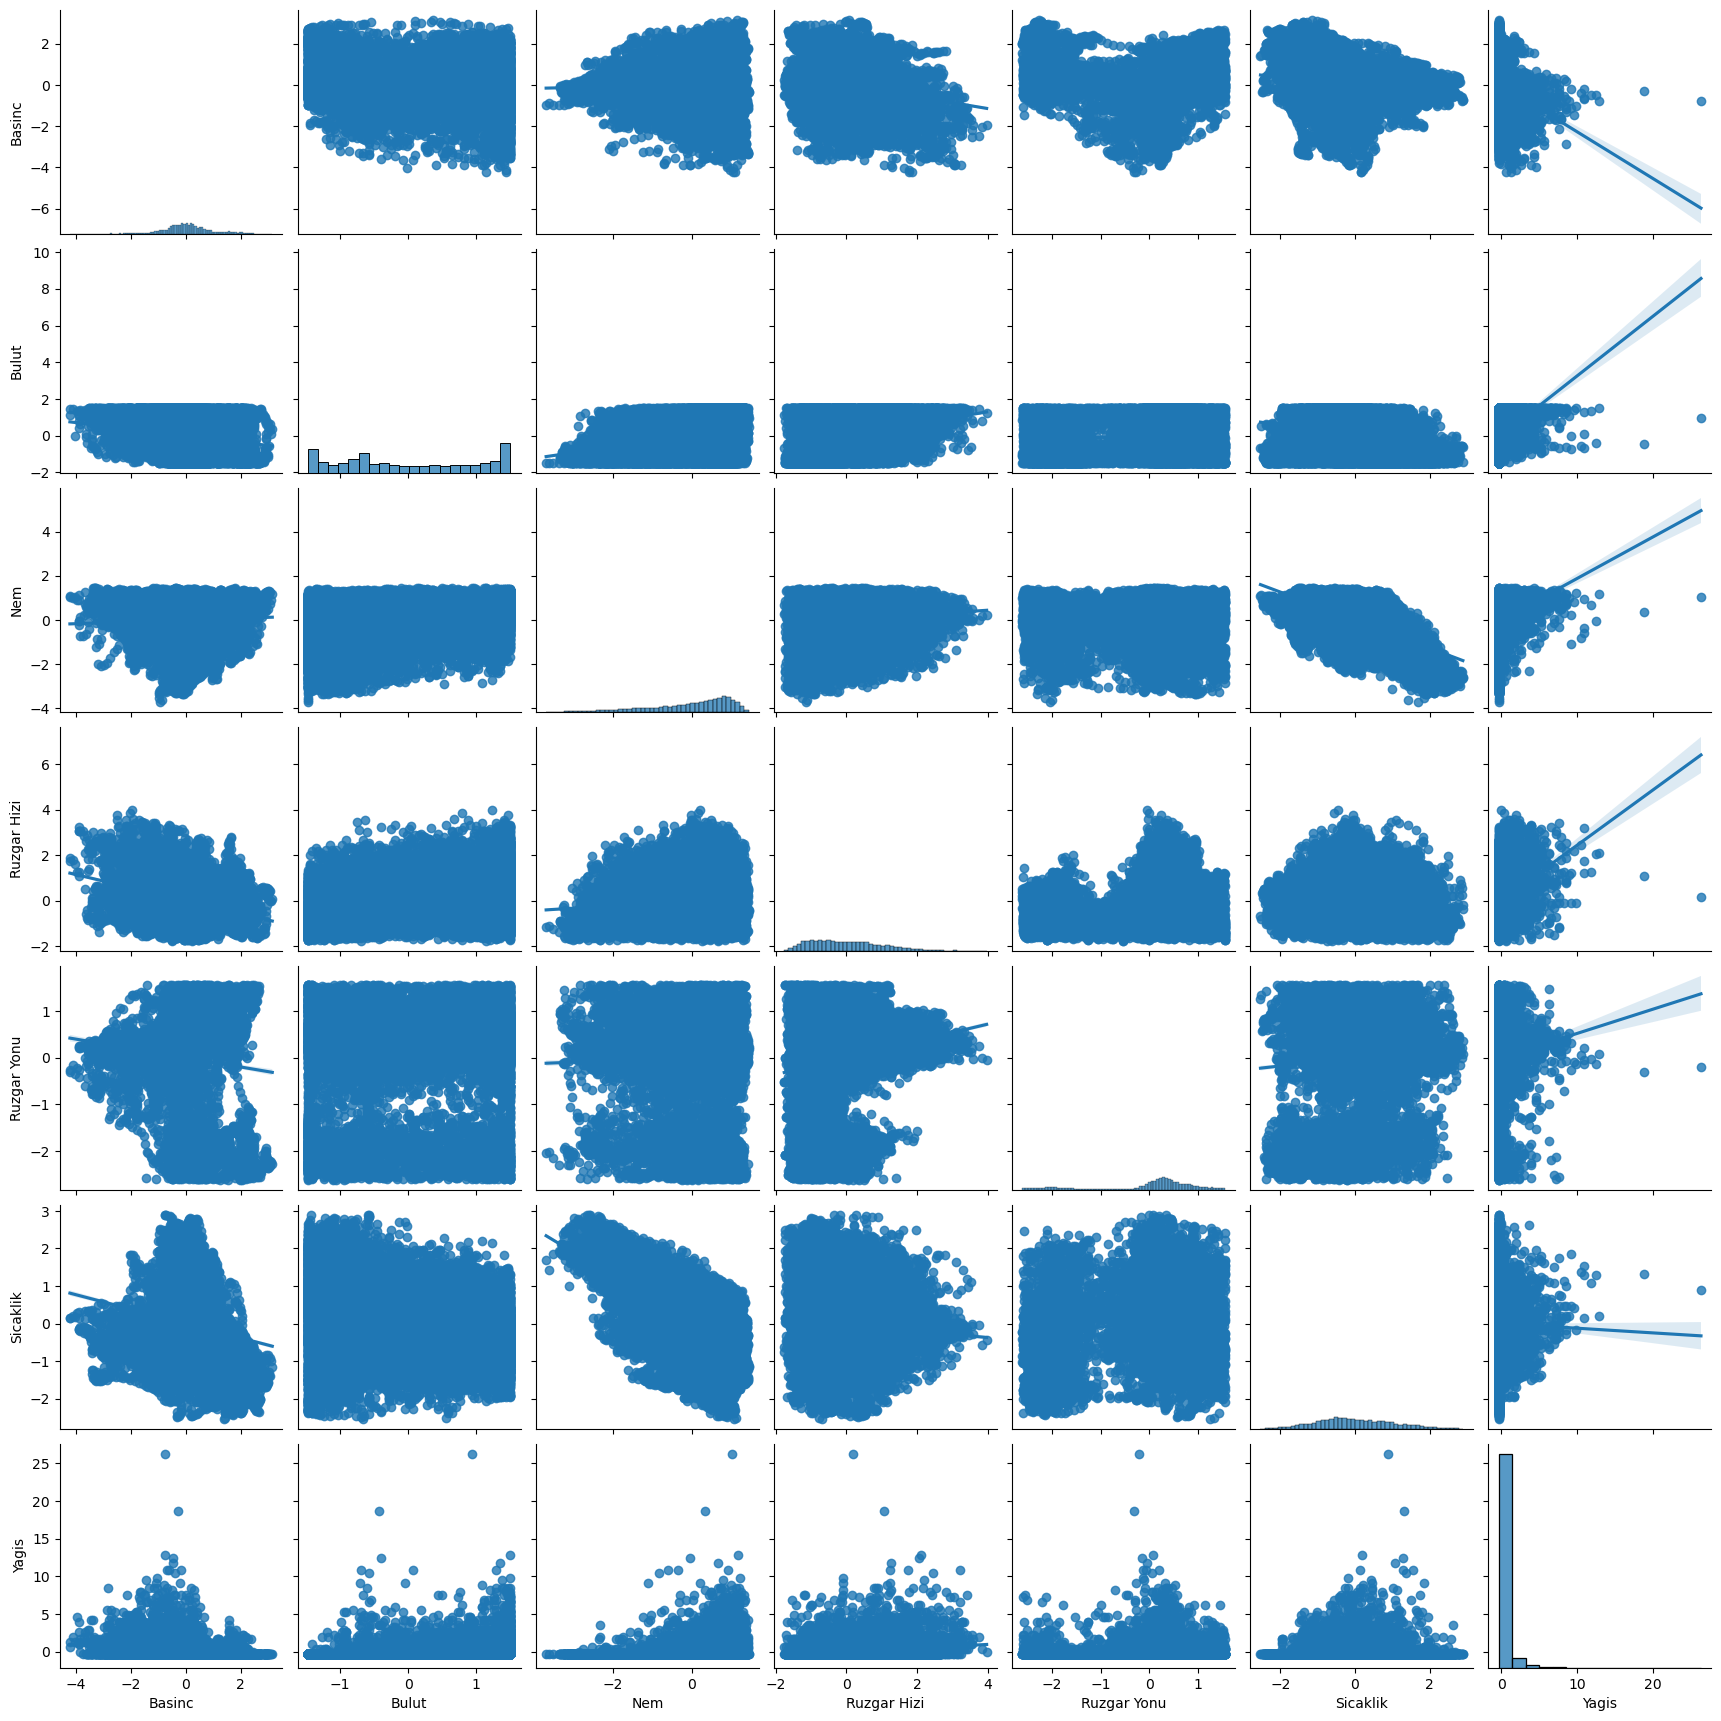

In [11]:
import seaborn as sns
sns.pairplot(df, kind='reg')